# Fasttext - BiLSTM

# Install Lib

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
!pip install transformers
from keras.preprocessing import sequence
import numpy as np
!pip install torch
!pip install tensorflow

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

In [3]:
!pip install textblob

# Init Data

In [4]:
from io import BytesIO

import requests
import pandas as pd

#r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
#data = r.content
dataset = pd.read_excel('E:\Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/All Dataset\Prepocessed (3).xlsx', dtype=str, index_col=None)
#dataset = pd.read_excel(data, 'Prepocessed (3)')
dataset

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Asiyah\AppData\Local\Temp\ipykernel_20156\2136667265.py:8: SyntaxWarning: invalid escape sequence '\A'
  dataset = pd.read_excel('E:\Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/All Dataset\Prepocessed (3).xlsx', dtype=str, index_col=None)


,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [5]:
len(dataset)

2502

# Split Data

In [6]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [7]:
from sklearn.model_selection import KFold
#KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
  #  print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   X_train, X_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

In [8]:
#Y = dataset['labels']
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
# Setelah pemisahan, pastikan X_test dan y_test memiliki jumlah yang sama
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (2002,)
Ukuran y_train: (2002,)
Ukuran X_test: (500,)
Ukuran y_test: (500,)


In [9]:
# import tensorflow as tf

# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_categorical(y_test, 2)

# Word Embedding Fasttext

In [10]:
# import os
# # Install Gensim
# !pip install --upgrade gensim
# !pip install fasttext
# # Download dan unzip dataset
# wrdvec_path = 'cc.id.300.bin.gz'
# #if not os.path.exists(wrdvec_path):
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
# !gunzip cc.id.300.vec.gz

# Step 1: Load Pretrained FastText Embeddings
embedding_vectors_fasttext = {}
embedding_file_path = "E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings/cc.id.300-002.vec"
with open(embedding_file_path, "r", encoding="utf-8") as file:
    file.readline()  # skip header
    for line in file:
        word, vector = line.split(maxsplit=1)
        vector = np.fromstring(vector, "float32", sep=" ")
        embedding_vectors_fasttext[word] = vector

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
# Step 2: Tokenize your text data (assuming `X_train` and `X_test` are your text datasets)
max_fatures = 100000
#Tensorflow Tokenizer
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X_train)

# Convert text to sequence of integers (list of indices)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [13]:
# Step 3: Pad sequences so that they have the same length
max_length = 257  # asumsi maksimal panjang sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print(X_train_pad.shape)
print(X_test_pad.shape)

(2002, 257)
(500, 257)


In [14]:
# Step 4: Create an embedding matrix based on the FastText vectors
vocab_size = len(tokenizer.index_word)+1
embedding_dim = 300  # We use the FastText embedding dimension

embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Initialize matrix with zeros

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_vectors_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign the embedding vector to the matrix
        
# Now you can use `embedding_matrix` for your model input
# Example: You can create a Keras Embedding layer like this:
# embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)

# Step 5: Now X_train_pad and X_test_pad are ready for training with the embedding layer

In [15]:

# num_tokens = len(tokenizer.index_word)+1

# def get_weights(embedding_vectors,embedding_dim):
#     global num_tokens,tokenizer

#     # assign vectors to words using the pretrained model embedding_vectors
#     embedding_weights = np.zeros((num_tokens,embedding_dim))

#     # count how many words are not assigned with the pretrained model.
#     # By default, vectors associated to words are zero vectors.
#     misses = 0

#     # the index in word_index starts with 1
#     for word, i in tokenizer.word_index.items():
#         vector = embedding_vectors.get(word)
#         # the word_index is ordered by word frequency
#         if i>=num_tokens :
#             break
#         elif vector is not None:
#             embedding_weights[i] = vector
#         else:
#             if len(word)<20:
#                 word = Word(word)
#                 word = word.spellcheck()[0][0]
#                 vector = embedding_vectors.get(str(word))
#                 if vector is not None:
#                     embedding_weights[i] = vector
#                 else:
#                     misses +=1
#                     #print(word)
#             else:
#                 misses +=1
#                 #print(word)

#     print(f"The number of missed words is {misses}")

#     return embedding_weights

In [16]:
import os
path = r"E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings/cc.id.300-002.vec"
print(os.path.exists(path))

True


In [17]:
# assign vectors to words using the pretrained model fasttext
# embedding_matrix = get_weights(embedding_vectors_fasttext, embedding_dim=300)

## Saved Embedding Model

In [18]:
# Step 1: Menyimpan embedding matrix
filename_npy = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/FT_svm_embedding.npy'
# Simpan embedding matrix ke dalam file .npy
np.save(filename_npy, embedding_matrix)

print(f"Embedding matrix saved to {filename_npy}")

Embedding matrix saved to E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/FT_svm_embedding.npy


# Split Word Embedding to Training-Testing

In [19]:
# # Convert training and testing data to vectors using the word embeddings
# X_train_ft = get_weights(X_train, embedding_matrix)  # Replace with your actual conversion function
# X_test_ft = get_weights(X_test, embedding_matrix)

X_train_embed = embedding_matrix[X_train_pad]
X_test_embed = embedding_matrix[X_test_pad]

# SVM

In [21]:
#Langkah 1: Menghitung rata-rata vektor kata untuk setiap dokumen
# Model seperti SVM mengharuskan data inputnya dalam bentuk vektor berdimensi tetap. Namun, teks bisa memiliki 
#panjang yang bervariasi (misalnya, kalimat yang lebih pendek atau lebih panjang).
#Setiap kata dalam teks memiliki vektor yang diperoleh dari model seperti FastText. Tapi jika kita ingin mewakili 
#seluruh kalimat atau paragraf dengan satu vektor, kita perlu cara untuk menggabungkan vektor-vektor kata tersebut menjadi satu vektor representasi yang tetap ukurannya.
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fungsi untuk menghitung rata-rata vektor kata untuk setiap kalimat
def get_average_word_vector(X, tokenizer, embedding_vectors_fasttext, embedding_dim=300):
    # Hasil rata-rata vektor untuk setiap dokumen
    document_vectors = []
    for sequence in X:
        word_vectors = []
        for idx in sequence:
            word = tokenizer.index_word.get(idx)
            if word in embedding_vectors_fasttext:
                word_vectors.append(embedding_vectors_fasttext[word])
        if word_vectors:
            document_vectors.append(np.mean(word_vectors, axis=0))  # Rata-rata vektor kata
        else:
            document_vectors.append(np.zeros(embedding_dim))  # Jika tidak ada kata yang cocok
    return np.array(document_vectors)

# Mendapatkan rata-rata vektor untuk X_train_pad dan X_test_pad
X_train_vectors = get_average_word_vector(X_train_pad, tokenizer, embedding_vectors_fasttext)
X_test_vectors = get_average_word_vector(X_test_pad, tokenizer, embedding_vectors_fasttext)

# Menyiapkan label untuk klasifikasi (misal binary classification)
# Jika y_train dan y_test dalam bentuk one-hot encoding, ubah ke bentuk 1D
#y_train = np.argmax(y_train, axis=1)
#y_test = np.argmax(y_test, axis=1)

# Pastikan sekarang y_train dan y_test dalam bentuk 1D
print(y_train.shape)  # Harus (n_samples,)
print(y_test.shape)   # Harus (n_samples,)

(2002,)
(500,)


In [22]:
# Periksa ukuran data input dan label
print(f'Ukuran X_test_pad: {X_test_pad.shape}')
print(f'Ukuran X_test_vectors: {X_test_vectors.shape}')
print(f'Ukuran y_test: {y_test.shape}')

# Pastikan X_test memiliki jumlah yang sesuai dengan y_test
print(f"Jumlah data X_test: {len(X_test)}")
print(f"Jumlah label y_test: {len(y_test)}")

Ukuran X_test_pad: (500, 257)
Ukuran X_test_vectors: (500, 300)
Ukuran y_test: (500,)


NameError: name 'y_pred' is not defined

In [23]:
#Langkah 2: Melatih model SVM
svm_model = SVC(kernel='linear')  # Anda bisa menggunakan kernel lain jika diperlukan (misalnya 'rbf', 'poly')
svm_model.fit(X_train_vectors, y_train)

# Memprediksi hasil pada X_test
y_pred = svm_model.predict(X_test_vectors)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

## Get Evaluate Score

In [32]:
# yhat = svm_model.predict(X_test_vectors)
# classes_x=np.rint(yhat)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Misalnya, yhat adalah hasil prediksi yang berupa string
# Konversi hasil prediksi dan label ke format numerik
encoder = LabelEncoder()
y_pred_numeric = encoder.fit_transform(yhat)  # Mengonversi hasil prediksi menjadi angka

# Mengonversi y_test jika diperlukan (jika label y_test juga berupa string)
y_test_numeric = encoder.transform(y_test)  # Mengonversi y_test ke angka

# Evaluasi model dengan akurasi
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
print(f"Akurasi model: {accuracy:.4f}")

# Evaluasi lebih lanjut menggunakan classification report
print(classification_report(y_test_numeric, y_pred_numeric))


Akurasi model: 0.9080
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       228
           1       0.92      0.91      0.92       272

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test_numeric, y_pred_numeric,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_test_numeric, y_pred_numeric))

Precision :  0.9070853462157811
Recall    :  0.9076367389060888
F-score   :  0.9073462350344028
Accuracy :  0.908


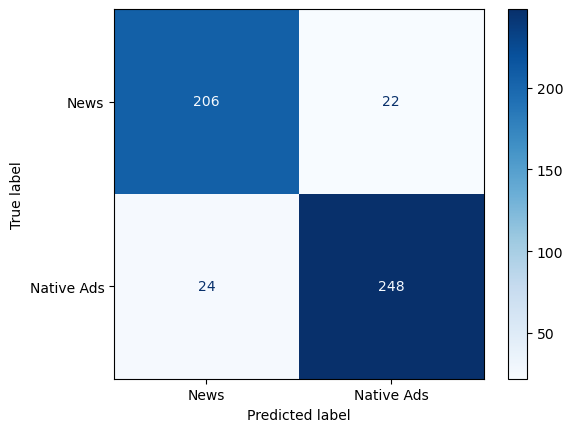

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["News", "Native Ads"]

cm = confusion_matrix(y_test_numeric, y_pred_numeric)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## roc

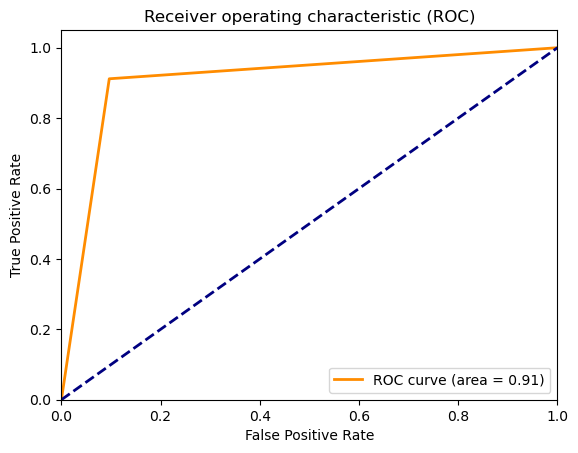

In [38]:
import numpy as np
from sklearn import metrics

y = np.array(y_test_numeric)

scores = np.array(y_pred_numeric)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_numeric)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [39]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_pred_numeric)
auc_rf = auc(fpr_rf, tpr_rf)

In [40]:
auc_rf

0.9076367389060888

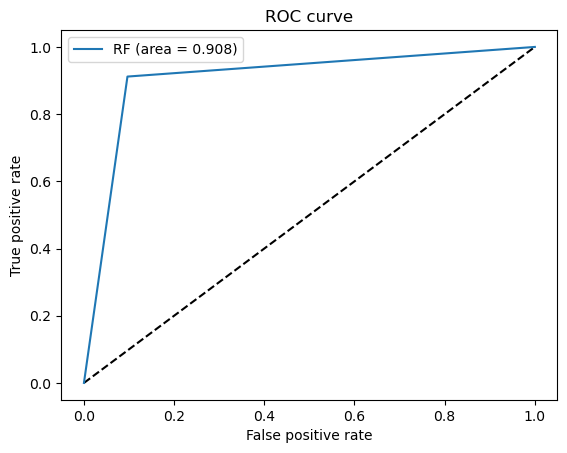

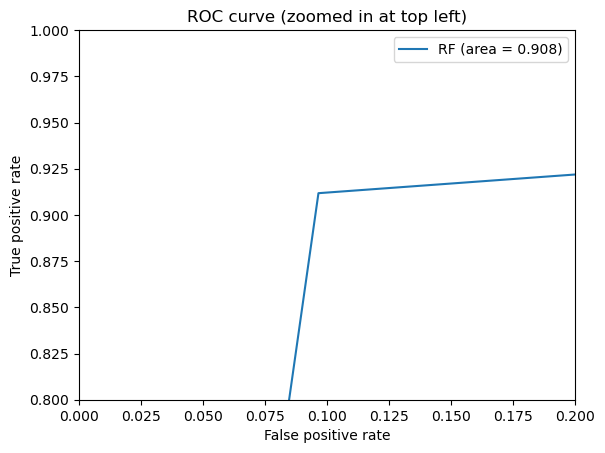

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [42]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_test_numeric, y_pred_numeric)

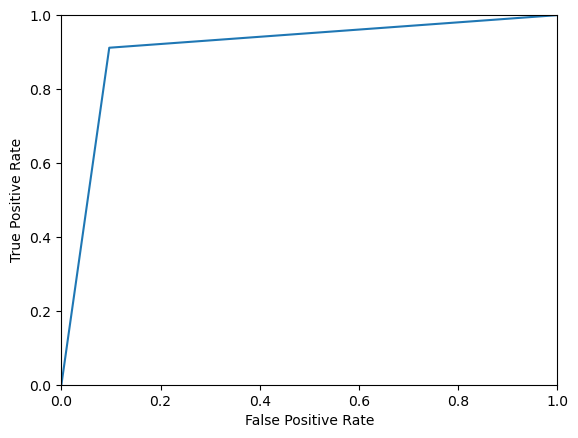

In [44]:
plot_roc_curve (fpr,tpr)

In [45]:
roc_auc_score(y_test_numeric, y_pred_numeric)

0.9076367389060888

0.9076367389060888


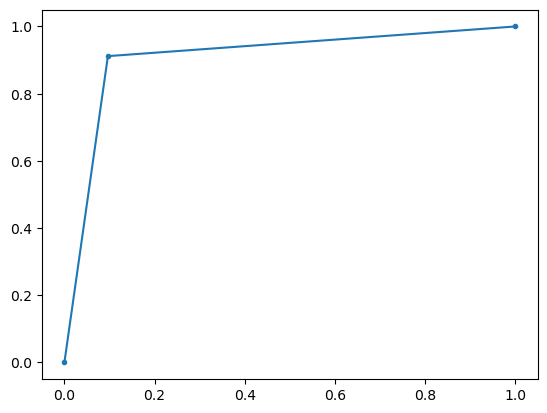

In [46]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_numeric, y_pred_numeric)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [47]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [48]:
perf_measure(y_test_numeric, y_pred_numeric)

(248, 22, 206, 24)

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

# Menampilkan Data Salah Prediksi

In [50]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return(TP, FP, TN, FN, FP_indices, FN_indices)

In [52]:
perf_measure(y_test_numeric, y_pred_numeric)

(248,
 22,
 206,
 24,
 [356,
  363,
  372,
  410,
  412,
  432,
  439,
  442,
  443,
  444,
  445,
  446,
  447,
  448,
  450,
  453,
  454,
  459,
  460,
  475,
  491,
  499],
 [1,
  105,
  141,
  181,
  188,
  189,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  214,
  217,
  218,
  220,
  229,
  230,
  247,
  248,
  259,
  263,
  265])

In [53]:
# Calculate the performance metrics and retrieve indices for FP and FN
TP, FP, TN, FN, FP_indices, FN_indices = perf_measure(y_test_numeric, y_pred_numeric)

# Select the FP and FN data from the dataset
FP_data = dataset.iloc[FP_indices][['id-berita', 'url', 'content per paragraf']]
FN_data = dataset.iloc[FN_indices][['id-berita', 'url', 'content per paragraf']]

In [54]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
    id-berita                                                url  \
356       276  https://tekno.sindonews.com/read/628343/776/op...   
363       277  https://tekno.sindonews.com/read/625267/776/xi...   
372       278  https://tekno.sindonews.com/read/624421/776/as...   
410       281  https://tekno.sindonews.com/read/605785/776/di...   
412       281  https://tekno.sindonews.com/read/605785/776/di...   
432       283  https://tekno.sindonews.com/read/601229/776/sp...   
439       284  https://tekno.sindonews.com/read/593345/776/ti...   
442       284  https://tekno.sindonews.com/read/593345/776/ti...   
443       284  https://tekno.sindonews.com/read/593345/776/ti...   
444       284  https://tekno.sindonews.com/read/593345/776/ti...   
445       284  https://tekno.sindonews.com/read/593345/776/ti...   
446       284  https://tekno.sindonews.com/read/593345/776/ti...   
447       284  https://tekno.sindonews.com/read/593345/776/ti...   
448       284  https://tek

In [58]:
import os
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/SVM/'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_Data_FastText-SVM-Biner.csv')
fn_file_path = os.path.join(folder_path, 'FN_Data_FastText-SVM-Biner.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)